# Simulating competing hazards

Previously, you modelled an infected cohort in R. In this exercise, the focus is on adding disease-induced mortality to this model in order to explore the concept of competing hazards as introduced in the video. Using this model, you will also calculate the case fatality ratio, and compare it against the result using the formula approach that you have been introduced to.

The model we want to specify in this notebook has 3 compartments: $I$ (infected), $R$ (recovered) and $M$ (dead). 

The differential equations for the model look like this:
\begin{align}
\frac{dI}{dt} & = -\gamma I -\mu I \\
\frac{dR}{dt} & = \gamma I \\
\frac{dM}{dt} & = \mu I
\end{align}

### Question: what do $\gamma$ (*gamma*) and $\mu$ (*mu*)  represent? Draw the model diagram corresponding to these equations.

Now, incorporate the new compartment and transition into your code. Since we already have a working scaffold for a model from the first coding etivity, it is good practice to copy and adapt it. In the cell below, copy-paste the **model function** from the previous etivity and modify it according to the new differential equations above. Make sure you understand what every line of the code means, and run it once you're ready.

In [17]:
# Again you need to load the packages
library(deSolve)
library(reshape2)
library(ggplot2)

### YOUR MODEL BELOW: ###

initial_number_infected <- 1000000  # a cohort, 1000000 currently infected
                                    # people
initial_number_recovered <- 0 # no one has recovered

initial_number_died <- 0
                                    # at the beginning of the simulation
recovery_rate <- 1/10               # the average duration spent in the I

mortality_rate <- 0.2
                                    # compartment is 10 days,
                                    # so rate of recovery = 1/10 days^-1 
                                    # or 0.1 per day
follow_up_duration <- 4*7           # we want to know how many recover 
                                    # over a 4 week period, 
                                    # which equals 4*7 = 28 days



Like in the first etivity, you also need to define your model inputs and the time sequence to run the model for. Fill in the cell below based on the following information:
At the start, there are 10$^6$ infected people. No one has recovered or died yet. The recovery rate $\gamma$ is 0.1 days$^{-1}$ and the mortality rate $\mu$ is 0.2 days$^{-1}$. Again we want to model the course of the infection over 4 weeks.

### Question: after 4 weeks, do you expect more people to have recovered or more people to have died, and why? Proceed with the next steps to check if you are right.

In [31]:
# Combine into the model input vectors:
initial_state_values <- c(I = initial_number_infected, 
                          R = initial_number_recovered,
                          M=initial_number_died)  

parameters <- c(gamma = recovery_rate,miu=mortality_rate)  

times <- seq(from = 0, to = follow_up_duration, by = 1) 

# Look back at the code in the previous etivity if you cannot 
# remember how to define these vectors.

cohort_model <- function(time, state, parameters) {    # specify the model 
                                                       # as a function with
                                                       # input arguments
    
    with(as.list(c(state, parameters)), {  
      
    # Differential equations
      dI <- -(gamma+miu)*I
      dM <- miu*I
      dR <- gamma*I
        
    return(list(c(dI, dR, dM)))                             # return output
    })
  
}

Now we can solve the differential equations using the deSolve package. If you renamed your model function in the first cell, you of course also have to change it in the following code.

In [32]:
output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

In [4]:
output

time,I,R,M
0,1000000.0000,0.0,0.00
1,740818.2240,172787.9,86393.93
2,548811.6238,300792.3,150396.13
3,406569.6441,395620.2,197810.12
4,301194.1295,465870.6,232935.29
5,223130.0332,517913.3,258956.66
6,165298.7445,556467.5,278233.75
7,122456.2989,585029.1,292514.57
8,90717.8284,606188.1,303094.06
9,67205.4086,621863.1,310931.53


In [7]:
output_long

time,variable,value
0,I,1000000.0000
1,I,740818.2240
2,I,548811.6238
3,I,406569.6441
4,I,301194.1295
5,I,223130.0332
6,I,165298.7445
7,I,122456.2989
8,I,90717.8284
9,I,67205.4086


It's always a good idea to plot the model output to see if it makes sense. Do this below, keeping in mind we now have 3 lines: the number infected, recovered and deceased over time. Additionally, try to give the legend a more informative title than "variable". The best way to find out how is to search the internet! For example, look up something like: *ggplot change legend title* in your favourite search engine.

Was your hypothesis regarding the previous question correct?

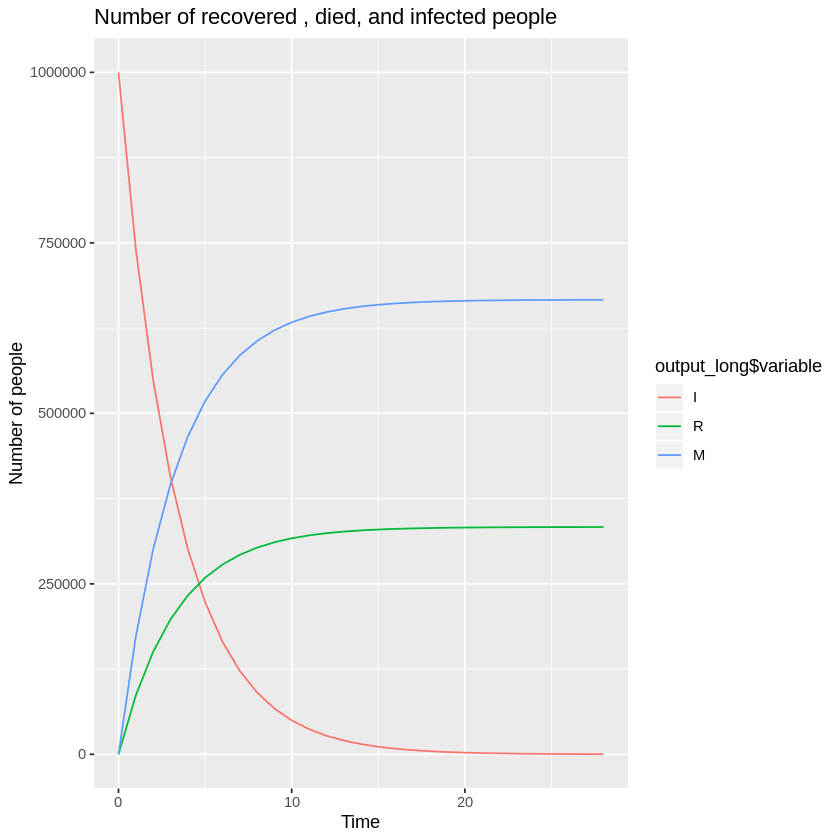

In [33]:
### YOUR PLOT CODE GOES HERE ###

output_long=melt(as.data.frame(output),id="time")
ggplot(data=output_long,
      aes(x=output_long$time,y=output_long$value,colour=output_long$variable,group=variable))+
         geom_line()+
         xlab("Time")+
         ylab("Number of people")+
         labs(title=paste("Number of recovered , died, and infected people"))
          
         

The next few exercises allow you to explore the competing hazards between recovery and death.

### Question: based on the model output, what proportion of the initially infected cohort died before recovering over the 4 week period?

In [34]:
# Answer: 
prop=(output[output$time==28,"M"])/((output[output$time==28,"R"])+(output[output$time==28,"I"])+(output[output$time==28,"M"]))
prop*100

[1] 66.65168

### Question: now use the competing hazards formula given in the video lecture to calculate the case fatality rate. Does this agree with your answer to the previous question?

In [35]:
# Answer: 
cfr=mortality_rate/(mortality_rate+recovery_rate)
cfr

[1] 0.6666667

### Question: Which value of $\mu$ do you need to get a case fatality rate of 50% assuming $\gamma$ stays fixed? You can calculate this on paper.

In the cell below, copy-paste the code from above and modify it to simulate the model using using the $\mu$ value that you have just calculated. Verify that the code does indeed gives you a CFR of 50%!

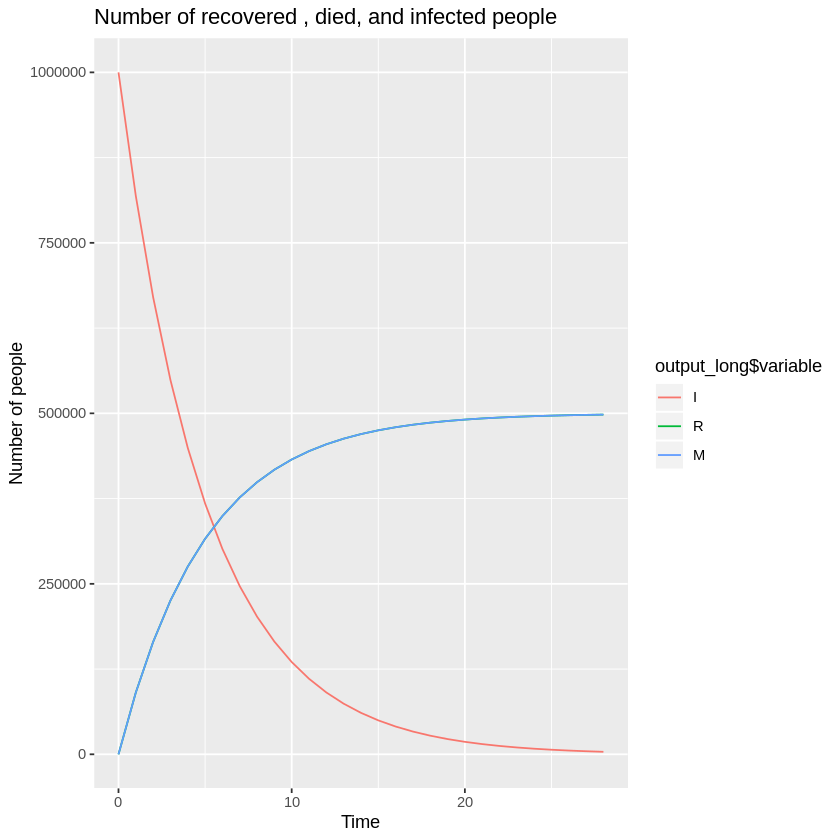

In [36]:
### YOUR CODE GOES HERE ###

# Again you need to load the packages
library(deSolve)
library(reshape2)
library(ggplot2)

### YOUR MODEL BELOW: ###

initial_number_infected <- 1000000  # a cohort, 1000000 currently infected
                                    # people
initial_number_recovered <- 0 # no one has recovered

initial_number_died <- 0
                                    # at the beginning of the simulation
recovery_rate <- 1/10               # the average duration spent in the I

mortality_rate <- 0.1
                                    # compartment is 10 days,
                                    # so rate of recovery = 1/10 days^-1 
                                    # or 0.1 per day
follow_up_duration <- 4*7           # we want to know how many recover 
                                    # over a 4 week period, 
                                    # which equals 4*7 = 28 days


# Combine into the model input vectors:
initial_state_values <- c(I = initial_number_infected, 
                          R = initial_number_recovered,
                          M=initial_number_died)  

parameters <- c(gamma = recovery_rate,miu=mortality_rate)  

times <- seq(from = 0, to = follow_up_duration, by = 1) 

# Look back at the code in the previous etivity if you cannot 
# remember how to define these vectors.

cohort_model <- function(time, state, parameters) {    # specify the model 
                                                       # as a function with
                                                       # input arguments
    
    with(as.list(c(state, parameters)), {  
      
    # Differential equations
      dI <- -(gamma+miu)*I
      dM <- miu*I
      dR <- gamma*I
        
    return(list(c(dI, dR, dM)))                             # return output
    })
  
}

output <- as.data.frame(ode(y = initial_state_values, 
                            times = times, 
                            func = cohort_model,
                            parms = parameters))

### YOUR PLOT CODE GOES HERE ###

output_long=melt(as.data.frame(output),id="time")
ggplot(data=output_long,
      aes(x=output_long$time,y=output_long$value,colour=output_long$variable,group=variable))+
         geom_line()+
         xlab("Time")+
         ylab("Number of people")+
         labs(title=paste("Number of recovered , died, and infected people"))
          
         


**Once you are done, have a look at the model answers in the "Solutions" file!**